# Alunos:
João Pedro Gomes dos Santos - 123408066

Cauã Elias Dourado Moitinho - 123240816


# Problema de Valor Inicial
Motivação: calcular soluções de equações diferenciais, de maneira discreta.

$$y'(t) = f(t, y(t))$$
$$y(t_0) = y_0$$

- A derivada depende da variável independente $t$ e da função $y$


### Discretizar o domínio:
$Dm = {t_0, t_1, ..., t_n}$, onde: $t_i = t_0 + ih$

$h$: a distância entre dois pontos do dominio.
i: índices $0$ a $n$

Quero determinar $y_i ≃ y(t_i)$

### PVI no domínio discreto:
$$y'(t_i) = f(t_i, y(t_i))$$

Com $y$ dado

Basta que saibamos calcular a derivada também de maenira discreta, isso é:

$$y'_i = f(t_i, y_i)$$
Onde, $y_i$ e $f(t_i, y(t_i))$ são aproximações.

com algebrismo, chegamos a:

$$y_{i+1} = y_i + hf(t_i, y_i)$$

Este e o método de euler, com erro também da ordem de h, $O(h)$


### Exemplo:
$$y'(t) = f(t, y(t))$$
$$y(t_0) = y_0$$



# Erros:

$$E_{ABS} = |y(a) - y_i|$$
$$E_{REL} = \frac{E_{ABS}}{y(a)}$$

onde $y_i$ é a ultima iteração feita e $y(a)$ o valor calculado.

# Algoritmo:

Entrada: $t_0, y_0, f(t, y), h, i$

Saida: $y_n$

Iteramos em $$y_{i+1} = y_i + hf(t_i, y_i)$$

até que $i+1 = n$

In [2]:
def y_aprox(t0, y0, h, n):
  yn = y0
  for i in range(n):
    yn = yn + h * f(t0, yn)
    t0 += h

  return yn

In [3]:
def f(t, y):
  return y

In [4]:
y_aprox(0, 1, 0.1, 2)

1.2100000000000002

In [5]:
# Erro

from sympy import *

def erro_abs(t0, y0, h, n, y, alpha=):
  aprox = y(t0, y0, h, n, alpha)
  real = exp(h*n)

  return real - aprox


In [6]:
erro_abs(0, 1, 0.1, 2)

0.0114027581601697

In [7]:
def erro_relative(t0, y0, h, n):
  return erro_abs(t0, y0, h, n) / exp(h*n)

In [8]:
erro_relative(0, 1, 0.1, 2)

0.00933578877564182

# Extensão do trabalho de Euler

### 1. Salve cada valor de t da discretização e cada valor de y calculado em listas.


In [9]:
def y_aprox_V2(t0, y0, h, n):
  yn = y0

  image = []
  domain = []

  image.append(y0)
  domain.append(t0)

  for i in range(n):
    yn = yn + h * f(t0, yn)
    t0 += h

    image.append(yn)
    domain.append(t0)


  return yn, image, domain

In [10]:
y_aprox_V2(0, 1, 0.1, 2)

(1.2100000000000002, [1, 1.1, 1.2100000000000002], [0, 0.1, 0.2])

### 2. Em uma lista, para cada valor de t da discretização salve o erro absoluto $E_abs = | y(t_i) - y_i |$

In [11]:
def erro_abs(t0, y0, h, n):
  aprox = y_aprox(t0, y0, h, n)
  real = exp(h*n)

  return real - aprox

def listagemErros_ABS(t0, y0, h, n):
  erros = []

  domain = y_aprox_V2(t0, y0, h, n)[2]

  for elemento in domain:
    erros.append(erro_abs(t0, y0, h, n))

  return erros


In [12]:
listagemErros_ABS(0, 1, 0.1, 2)

[0.0114027581601697, 0.0114027581601697, 0.0114027581601697]

### 3. Em uma lista, para cada valor de t da discretização salve o erro relativo $E_{rel} =  \frac{E_{abs}}{| y(t_i) |}$


In [13]:
import numpy as np

def listagemErros_REL(t0, y0, h, n):
  erros = []

  tuple_function = y_aprox_V2(t0, y0, h, n)

  domain = tuple_function[2]
  image = tuple_function[1]

  for elemento in domain:
    erros.append(erro_abs(t0, y0, h, n))

  return np.array(erros) / np.array(image)

In [14]:
listagemErros_REL(0, 1, 0.1, 2)

array([0.0114027581601697, 0.0103661437819724, 0.00942376707452039],
      dtype=object)

### 4. Gere os gráficos $t$ x $y(t_i)$ e $t$ x $y_i$ n o mesmo sistema de eixos

In [15]:
import matplotlib.pyplot as plt

def plot_y(t0, y0, h, n):
  domain = y_aprox_V2(t0, y0, h, n)[2]
  y_real = []
  y_aproximado = y_aprox_V2(t0, y0, h, n)[1]


  for elemento in domain:
    y_real.append(exp(elemento))

  fig, ax = plt.subplots(figsize=(5, 5))

  ax.plot(domain, y_real, label='Real')
  ax.plot(domain, y_aproximado, label='Aproximado')

  ax.set_xlabel('Domínio')
  ax.set_ylabel('Valores')
  ax.set_title('Real vs. Aproximado')
  ax.legend()

  plt.show()

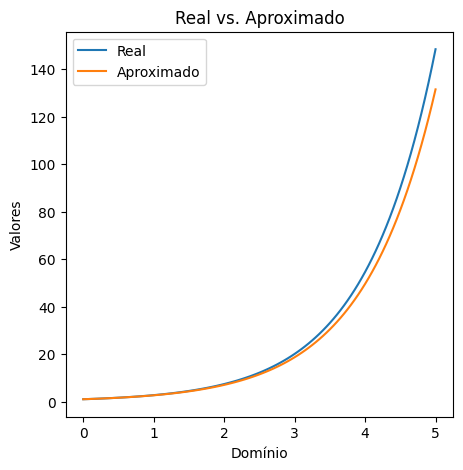

In [16]:
plot_y(0, 1, 0.05, 100)

### 5. Gere o gráfico $t$ x $E_{abs}$

In [17]:
def plot_erro_ABS(t0, y0, h, n):
  domain = y_aprox_V2(t0, y0, h, n)[2]
  errors = listagemErros_ABS(t0, y0, h, n)

  plt.plot(domain, errors)
  plt.ylabel("Erros Absolutos")
  plt.xlabel("Domínio")
  plt.show()

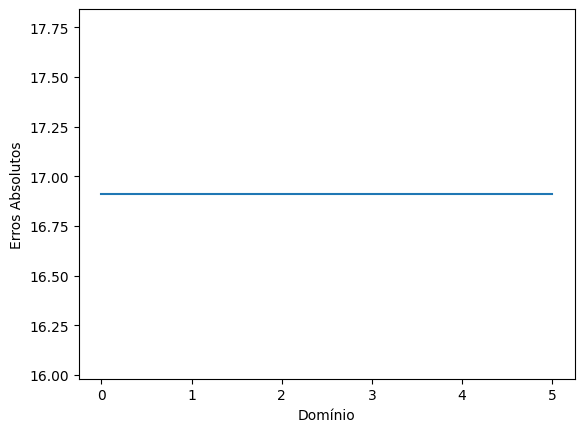

In [18]:
plot_erro_ABS(0, 1, 0.05, 100)

### 6. Gere o gráfico $t$ x $E_{rel}$
---



In [19]:
def plot_erro_REL(t0, y0, h, n):
  domain = y_aprox_V2(t0, y0, h, n)[2]
  errors = listagemErros_REL(t0, y0, h, n)

  plt.plot(domain, errors)
  plt.ylabel("Erros Relativos")
  plt.xlabel("Domínio")
  plt.show()

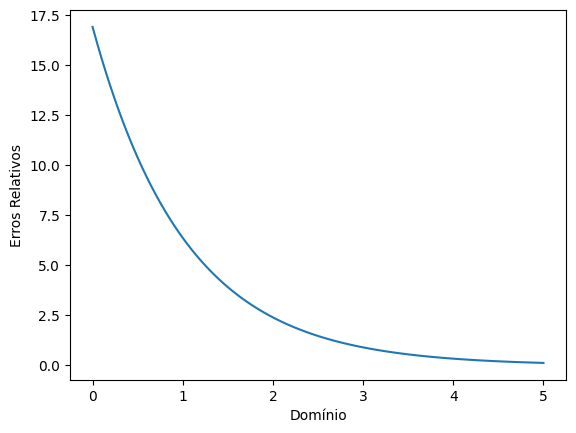

In [20]:
plot_erro_REL(0, 1, 0.05, 100)

###7.
Suponhamos que uma dada população pode ser dividida em duas partes: os que têm uma determinada doença e podem infectar outros, e os que não tem,mas são suscetíveis a tal doença. Seja $x$ a proporção de indivíduos suscetíveis e $y$ a proporção de infectados; logo, $x + y = 1$. Suponha que a doença se espalhe através do contato entre os indivíduos doentes e os que não estão, e
que a taxa de disseminação $\frac{dy}{dt}$ é proporcional ao número do contato entre infectados e não infectados. Suponha também que os elementos dos dois grupos circulam livremente, de forma que o número de contatos seja proporcional ao produto de x e y. Como temos $x = 1 - y$, o P.V.I. que modela o problema é dado por

$$y'(t) = \alpha y(t) ( 1- y(t) )$$
$$y(0) = y0$$

_*A única coisa que faremos é modificar a função $f$, o restante do método segue o mesmo*_\

In [64]:
# Essa é a mudança principal!
def f2(y, alpha):
  return alpha* y *(1 - y)

def y_aprox_V3(t0, y0, h, n, alpha):
  yn = y0

  image = []
  domain = []

  image.append(y0)
  domain.append(t0)

  for i in range(n):
    yn = yn + h * f2(yn, alpha)
    t0 += h

    image.append(yn)
    domain.append(t0)


  return yn, image, domain

In [75]:
def plot_y(t0, y0, h, n):
  domain = y_aprox_V3(t0, y0, h, n, 0)[2]
  y_real = []
  alphas = [0.7, 1, 1.3]
  for elemento in domain:
    y_real.append(y0 / (y0 + (1 - y0) * np.exp(-elemento)))


  fig, ax = plt.subplots(figsize=(5, 5))
  for alpha in alphas:
      y_values = y_aprox_V3(t0, y0, h, n, alpha)[1]
      plt.plot(domain, y_values, label=f'Aproximada (alpha={alpha})')

  ax.set_xlabel('Domínio')
  ax.set_ylabel('Valores')
  ax.set_title('Real vs. Aproximado')
  ax.legend()

  plt.show()

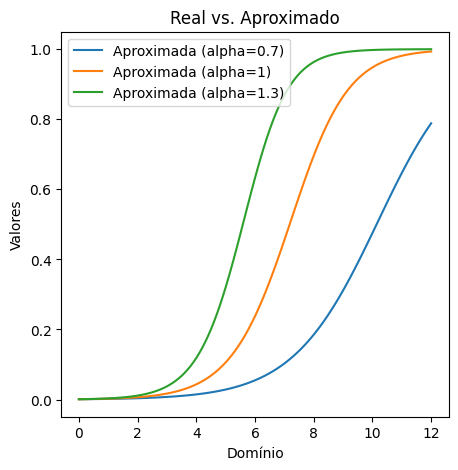

In [77]:
plot_y(0, (10 / 10000), 0.1, 120)

### 8. É possível mostrar que a solução do PVI acima é dada por $y(t) = \frac{y_0}{(1-y_0) e^{-\alpha t} + y0}$. Gere os gráficos definidos nos itens 4, 5 e 6 para o problema do item 7.

In [103]:
def plot_y_V2(t0, y0, h, n):
  domain = y_aprox_V3(t0, y0, h, n, 0)[2]
  y_real = []
  alphas = [0.7, 1, 1.3]
  for elemento in domain:
    y_real.append(y0 / (y0 + (1 - y0) * np.exp(-elemento)))


  fig, ax = plt.subplots(figsize=(5, 5))
  for alpha in alphas:
      y_values = y_aprox_V3(t0, y0, h, n, alpha)[1]
      plt.plot(domain, y_values, label=f'Aproximada (alpha={alpha})')

  plt.plot(domain, y_real, label=f'FUNCAO REAL')
  ax.set_xlabel('Domínio')
  ax.set_ylabel('Valores')
  ax.set_title('Real vs. Aproximado')
  ax.legend()

  plt.show()

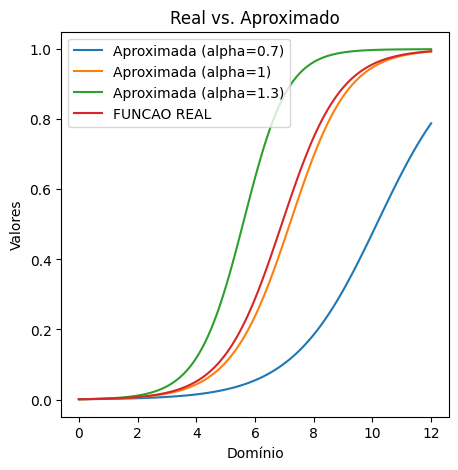

In [104]:
plot_y_V2(0, (10 / 10000), 0.1, 120)

In [98]:
def erro_abs_V2(t0, y0, h, n, alpha):
  aprox = y_aprox_V3(t0, y0, h, n, alpha)[0]
  real = y0 / (y0 + (1 - y0) * np.exp(-t0))

  return real - aprox

def listagemErros_ABS_V2(t0, y0, h, n, alpha):
  erros = []

  domain = y_aprox_V3(t0, y0, h, n, alpha)[2]

  for elemento in domain:
    erros.append(erro_abs_V2(t0, y0, h, n, alpha))

  return erros

def plot_erro_ABS_V2(t0, y0, h, n, alpha):
  domain = y_aprox_V3(t0, y0, h, n, alpha)[2]
  errors = listagemErros_ABS_V2(t0, y0, h, n, alpha)

  plt.plot(domain, errors)
  plt.ylabel("Erros Absolutos")
  plt.xlabel("Domínio")
  plt.show()

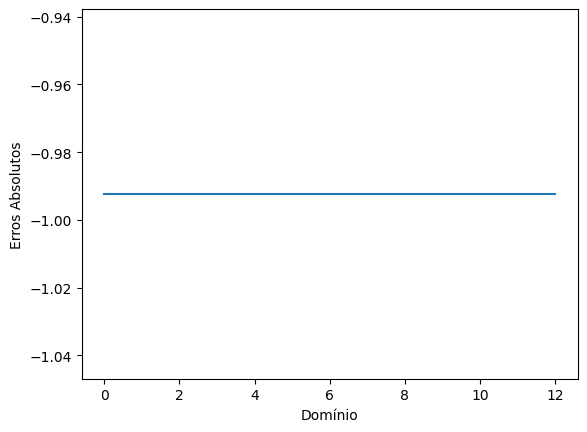

In [99]:
plot_erro_ABS_V2(0, (10 / 10000), 0.1, 120, 1)

In [100]:
def erro_abs_V2(t0, y0, h, n, alpha):
  aprox = y_aprox_V3(t0, y0, h, n, alpha)[0]
  real = y0 / (y0 + (1 - y0) * np.exp(-t0))

  return real - aprox

def listagemErros_REL_V2(t0, y0, h, n, alpha):
  erros = []
  tuple_function = y_aprox_V3(t0, y0, h, n, alpha)

  domain = tuple_function[2]
  image = tuple_function[1]

  for elemento in domain:
    erros.append(erro_abs_V2(t0, y0, h, n, alpha))

  return np.array(erros) / np.array(image)

def plot_erro_REL_V2(t0, y0, h, n, alpha):
  domain = y_aprox_V3(t0, y0, h, n, alpha)[2]
  errors = listagemErros_REL_V2(t0, y0, h, n, alpha)

  plt.plot(domain, errors)
  plt.ylabel("Erros Relativos")
  plt.xlabel("Domínio")
  plt.show()

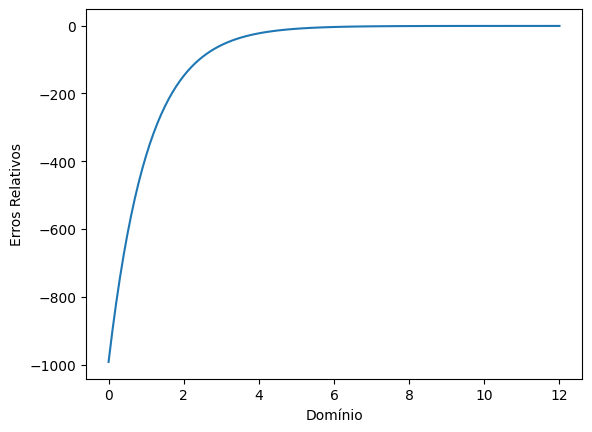

In [101]:
plot_erro_REL_V2(0, (10 / 10000), 0.1, 120, 1)